### Score: `[103]`

Q1. `[4+11+10]` Good job! 第一题注意一下变量信息即可

Q2. `[11]` Very good job!

Q3. `[4+5+5.5+5.5+5.5 +5.5+5+5.5+4+5]` Good job! 一些小问题详见注释

Q4. `[5.5+5.5+5.5]` 很细致的分析）赞

各题批注用`### Note`给出，请自行查阅。

In [3]:
#Task 1
import pandas as pd  

# Load the dataset
file_path = 'D:/ESE5023/Test/earthquakes-2024-10-27_16-20-31_+0800.tsv'  # replace with the actual path
Sig_Eqs = pd.read_csv(file_path, sep='\t')

In [4]:
# Group by country and sum the deaths  
deaths_per_country = Sig_Eqs.groupby('Country')['Deaths'].sum().reset_index()  
# Sort by deaths in descending order and get the top 20  
top_20_deaths = deaths_per_country.sort_values(by='Deaths', ascending=False).head(20)  
  
# Print the results  
print("Top 20 Countries with Total Deaths from Earthquakes Since 2150 B.C.:")  
print(top_20_deaths)

### Note: 变量应选择Total_Deaths
'''
从数据界面可以看到数据标签的详细注释
Deaths: Whenever possible, numbers of deaths are listed.
Total Deaths: Whenever possible, total number of deaths from the earthquake and secondary effects are listed.
'''

Top 20 Countries with Total Deaths from Earthquakes Since 2150 B.C.:
          Country     Deaths
28          CHINA  2075947.0
141        TURKEY  1188881.0
65           IRAN  1011453.0
69          ITALY   498418.0
132         SYRIA   439224.0
58          HAITI   323478.0
10     AZERBAIJAN   317219.0
71          JAPAN   279607.0
6         ARMENIA   191890.0
103      PAKISTAN   145083.0
66           IRAQ   136200.0
40        ECUADOR   135496.0
142  TURKMENISTAN   117412.0
107          PERU   102169.0
68         ISRAEL    90388.0
110      PORTUGAL    83572.0
53         GREECE    80378.0
27          CHILE    64277.0
62          INDIA    63507.0
133        TAIWAN    57153.0


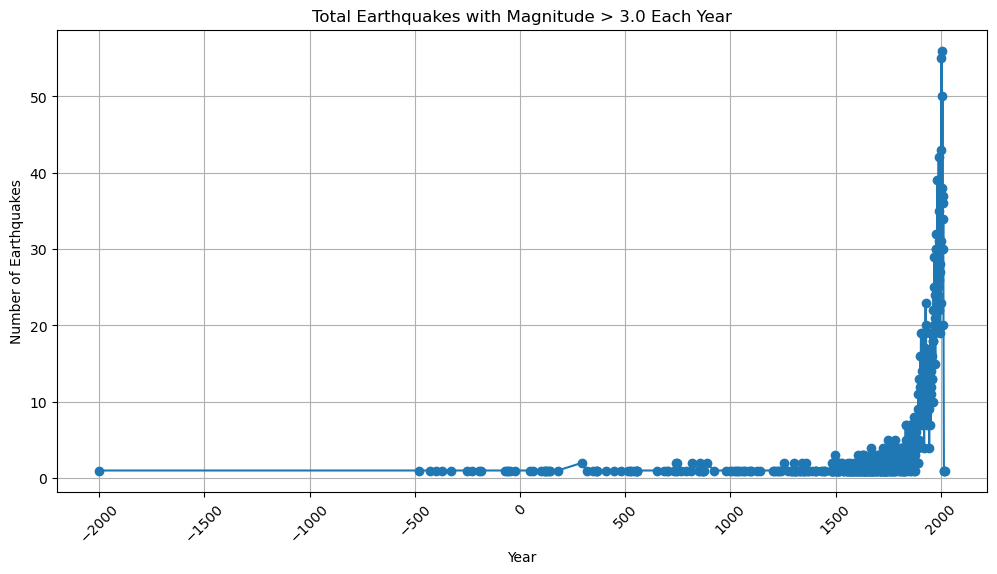

In [5]:
import matplotlib.pyplot as plt  

# Filter earthquakes with magnitude larger than 3.0  
large_magnitude_earthquakes = Sig_Eqs[Sig_Eqs['Ms'] > 3.0]  

# Group by year and count the earthquakes  
earthquakes_per_year = large_magnitude_earthquakes.groupby(large_magnitude_earthquakes['Year']).size().reset_index(name='Count')  

# Clean the Year column: remove non-integer values and convert to int
#earthquakes_per_year = earthquakes_per_year[earthquakes_per_year['Year'].str.replace('.', '', regex=False).str.isnumeric()]
#earthquakes_per_year['Year'] = earthquakes_per_year['Year'].astype(float).astype(int)

# Plot the time series  
plt.figure(figsize=(12, 6))  
plt.plot(earthquakes_per_year['Year'], earthquakes_per_year['Count'], marker='o')  
plt.title('Total Earthquakes with Magnitude > 3.0 Each Year')  
plt.xlabel('Year')  
plt.ylabel('Number of Earthquakes')  
plt.grid()  

# Set x-ticks to display every 50 years
plt.xticks(rotation=45)
plt.tight_layout
plt.show()  




In [6]:
def CountEq_LargestEq(country_name):
    #
    Sig_Eqs['Date'] = Sig_Eqs['Year'].astype(str) + '-' + Sig_Eqs['Mo'].fillna(1).astype(int).astype(str).str.zfill(2) + '-' + Sig_Eqs['Dy'].fillna(1).astype(int).astype(str).str.zfill(2)
    # Filter earthquakes for the given country  
    country_earthquakes = Sig_Eqs[Sig_Eqs['Country'] == country_name]  
      
    # Total number of earthquakes  
    total_earthquakes = len(country_earthquakes)  
      
    if total_earthquakes == 0:
        return (0, None, None)  # Return if no data for the country
        # Drop NaN values in the 'Ms' column
    
    country_earthquakes = country_earthquakes.dropna(subset=['Ms'])
    
    # Check if there are still entries left after dropping NaN
    if country_earthquakes.empty:
        return (total_earthquakes, None, None)  # Return if no valid earthquake data
    
    # Find the largest earthquake
    largest_eq_index = country_earthquakes['Ms'].idxmax()
    largest_eq = country_earthquakes.loc[largest_eq_index]

  
    # Return total number of earthquakes and the largest earthquake (or an empty representation of it)  
    return (total_earthquakes, largest_eq['Date'],largest_eq['Latitude'],largest_eq['Longitude'],largest_eq['Ms'] )
#Example: CHINA
CountEq_LargestEq('CHINA')


 
unique_countries = Sig_Eqs['Country'].unique()  
results = {country: CountEq_LargestEq(country) for country in unique_countries}


# Convert results to DataFrame and sort by total earthquakes in descending order  
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Total_Earthquakes', 'Largest_Earthquake_Date', 'Largest_Earthquake_Latitude','Largest_Earthquake_Longitude','Largest_Earthquake_Ms'])
sorted_results = results_df.sort_values(by='Total_Earthquakes', ascending=False)  
  
# Print the results  
print("Total Earthquakes and Largest Earthquake Ever for Each Country:")  
print(sorted_results)

# Save results to a CSV file
output_file_path = 'D:/ESE5023/Test/earthquake_summary.csv'
sorted_results.to_csv(output_file_path, index=True)

print(f"Results have been saved to {output_file_path}.")


### Note: 日期的年份用整数形式就更好了

Total Earthquakes and Largest Earthquake Ever for Each Country:
                          Total_Earthquakes Largest_Earthquake_Date  \
CHINA                                   623            1920.0-12-16   
JAPAN                                   419             869.0-07-13   
INDONESIA                               412            2004.0-12-26   
IRAN                                    386             856.0-12-22   
TURKEY                                  337            1939.0-12-26   
...                                     ...                     ...   
KIRIBATI                                  1                    None   
PALAU                                     1            1914.0-10-23   
CENTRAL AFRICAN REPUBLIC                  1                    None   
LIBYA                                     1            1963.0-02-21   
NaN                                       0                    None   

                          Largest_Earthquake_Latitude  \
CHINA                     

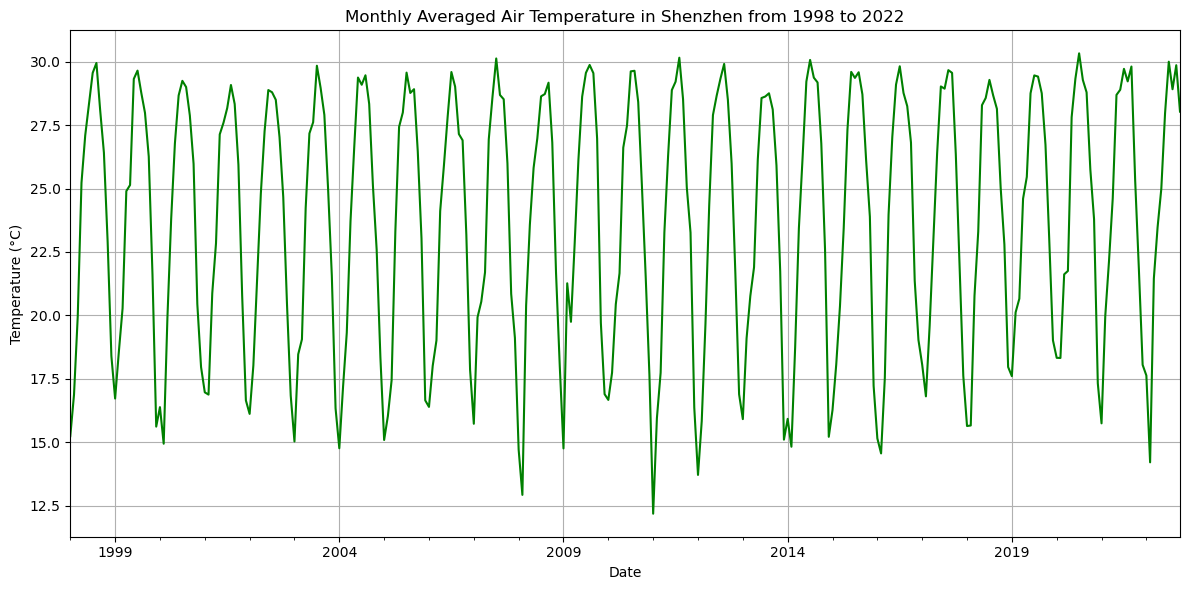

In [1]:
#Task 2
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
  
# Load the weather data  
df = pd.read_csv('Baoan_Weather_1998_2022.csv',low_memory = False)  
#test
#print(df.head())
#print(df.info())

df = df[df['TMP'] !=  '+9999,9']

# Split the 'TMP' column into 'Temperature' and 'Quality_Code'
df[['Temperature', 'Quality_Code']] = df['TMP'].str.split(',', expand=True)

# Convert Temperature to numeric (tenths of degrees Celsius)
# Apply the scaling factor to convert the temperature values to degrees Celsius by dividing each TMP value by 10.
df['Temperature'] = pd.to_numeric(df['Temperature'], errors='coerce') / 10

# Convert Quality_Code to string type (if needed)
df['Quality_Code'] = df['Quality_Code'].astype(str)

# Filter based on quality codes
valid_quality_codes = ['0', '1', '4', '5'] # Retain only those rows where the quality code is one of the accepted values (0, 1, 4, 5). This ensures that we only analyze temperature readings that are considered reliable.
df = df[df['Quality_Code'].isin(valid_quality_codes)]
# All quality codes in the TMP data column are 1, and it seems that no filtering is OK





df['datetime'] = pd.to_datetime(df['DATE'])  


# Drop rows with NaN values in Temperature
df = df.dropna(subset=['Temperature'])

  
# Set datetime as index
df.set_index('datetime', inplace=True) 
  
# Resample to monthly averages 
monthly_avg_temp = df['Temperature'].resample('ME').mean()  
  
 
plt.figure(figsize=(12, 6))  
monthly_avg_temp.plot(label='Monthly Average Temperature (°C)', color='green') 
plt.title('Monthly Averaged Air Temperature in Shenzhen from 1998 to 2022')  
plt.xlabel('Date')  
plt.ylabel('Temperature (°C)')  
plt.grid() 
plt.tight_layout() 
plt.show()  
  


In [58]:
#Task 3
import pandas as pd 
df = pd.read_csv('ibtracs.ALL.list.v04r00.csv',
                 usecols=range(17),
                 skiprows=[1, 2], ### Note: 不需要跳过索引为2的行，索引为2的行也是数据
                 parse_dates=['ISO_TIME'],
                 na_values=['NOT_NAMED', 'NAME'])
df.head()

C:\Users\zhangchen\AppData\Local\Temp\ipykernel_23368\3919166809.py:3: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ibtracs.ALL.list.v04r00.csv',


,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES,WMO_AGENCY,TRACK_TYPE,DIST2LAND,LANDFALL,IFLAG
0,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 06:00:00,NR,10.8709,79.8265,,,,main,0,0,__________P___
1,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 09:00:00,NR,10.8431,79.3524,,,,main,0,0,__________P___
2,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 12:00:00,NR,10.8188,78.8772,,,,main,0,0,__________P___
3,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 15:00:00,NR,10.8000,78.4000,,,,main,0,0,__________O___
4,1842298N11080,1842,1,NI,AS,NaN,1842-10-25 18:00:00,NR,10.7884,77.9194,,,,main,0,0,__________P___


In [54]:
#3.1
# Convert WMO_WIND to numeric, forcing errors to NaN
df['WMO_WIND'] = pd.to_numeric(df['WMO_WIND'], errors='coerce')


# Group by Storm Identifier and get the maximum wind speed
largest_hurricanes = df.groupby('SID').agg({'NAME': 'first', 'WMO_WIND': 'max'}).reset_index()

# Get the 10 largest hurricanes by wind speed
top_10_hurricanes = largest_hurricanes.nlargest(10, 'WMO_WIND')
print(top_10_hurricanes[['NAME', 'WMO_WIND']])

           NAME  WMO_WIND
12921  PATRICIA     185.0
9087      ALLEN     165.0
4105       None     160.0
10011   GILBERT     160.0
11067     LINDA     160.0
11944     WILMA     160.0
13307    DORIAN     160.0
11190     MITCH     155.0
11927      RITA     155.0
12337      RICK     155.0


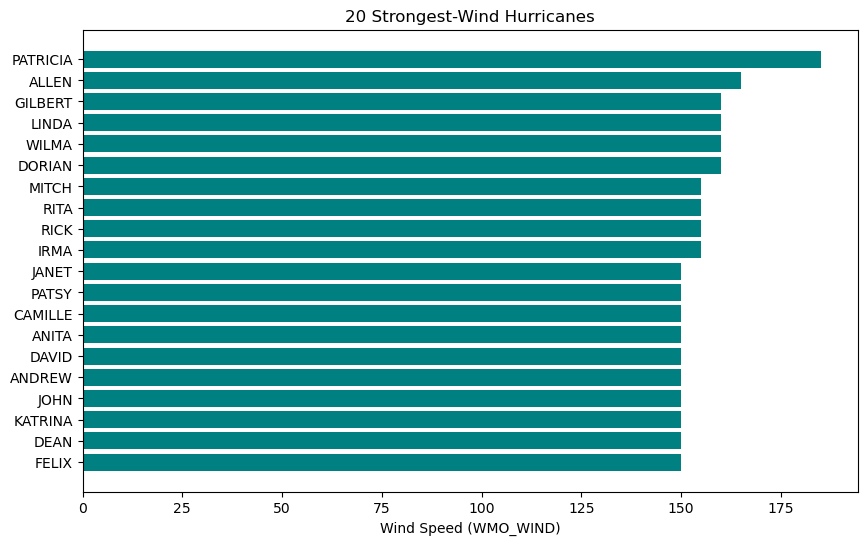

           NAME  WMO_WIND
12921  PATRICIA     185.0
9087      ALLEN     165.0
10011   GILBERT     160.0
11067     LINDA     160.0
11944     WILMA     160.0
13307    DORIAN     160.0
11190     MITCH     155.0
11927      RITA     155.0
12337      RICK     155.0
13098      IRMA     155.0
5881      JANET     150.0
6311      PATSY     150.0
7532    CAMILLE     150.0
8722      ANITA     150.0
8985      DAVID     150.0
10476    ANDREW     150.0
10704      JOHN     150.0
11908   KATRINA     150.0
12107      DEAN     150.0
12112     FELIX     150.0


In [10]:
#3.2
import matplotlib.pyplot as plt

# Get the 20 strongest-wind hurricanes
top_20_hurricanes = largest_hurricanes.nlargest(22, 'WMO_WIND')

# Ensure there are no NaN values in the top 20 hurricanes DataFrame
top_20_hurricanes = top_20_hurricanes.dropna(subset=['NAME', 'WMO_WIND'])

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_20_hurricanes['NAME'], top_20_hurricanes['WMO_WIND'], color='teal')
plt.xlabel('Wind Speed (WMO_WIND)')
plt.title('20 Strongest-Wind Hurricanes')
plt.gca().invert_yaxis()  # Invert y-axis to have the strongest on top
plt.show()
print(top_20_hurricanes[['NAME', 'WMO_WIND']])

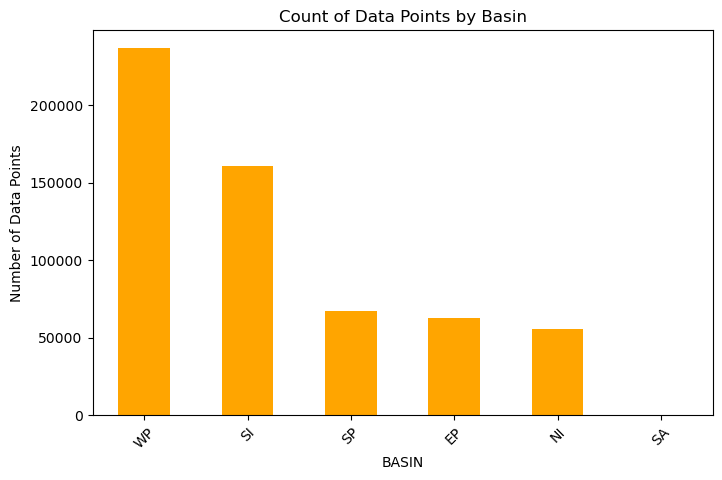

In [11]:
#3.3
# Count datapoints by Basin
basin_counts = df['BASIN'].value_counts()
# Create a bar chart
plt.figure(figsize=(8, 5))
basin_counts.plot(kind='bar', color='orange')
plt.ylabel('Number of Data Points')
plt.title('Count of Data Points by Basin')
plt.xticks(rotation=45)
plt.show()

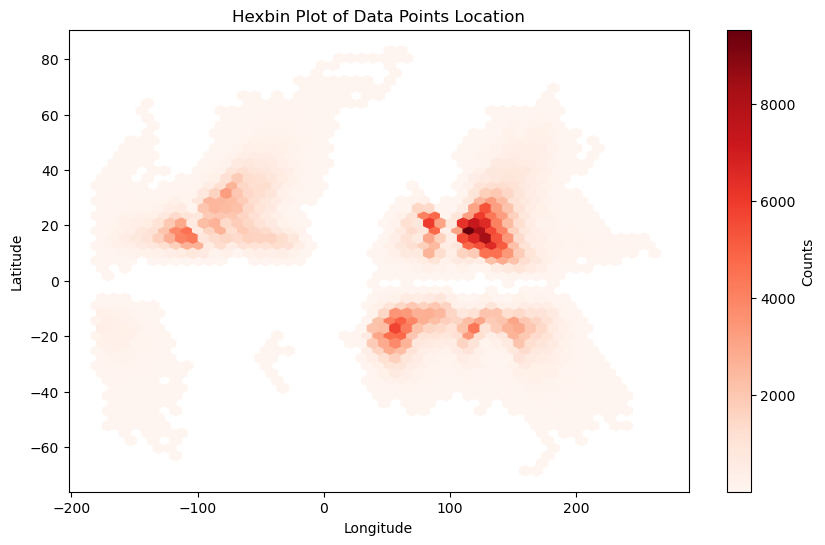

In [12]:
#3.4
# Create a hexbin plot
plt.figure(figsize=(10, 6))
plt.hexbin(df['LON'], df['LAT'], gridsize=50, cmap='Reds', mincnt =1 ) #set a mincnt， display cells with at least 1 number of points in the cell.
plt.colorbar(label='Counts')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Hexbin Plot of Data Points Location')
plt.show()

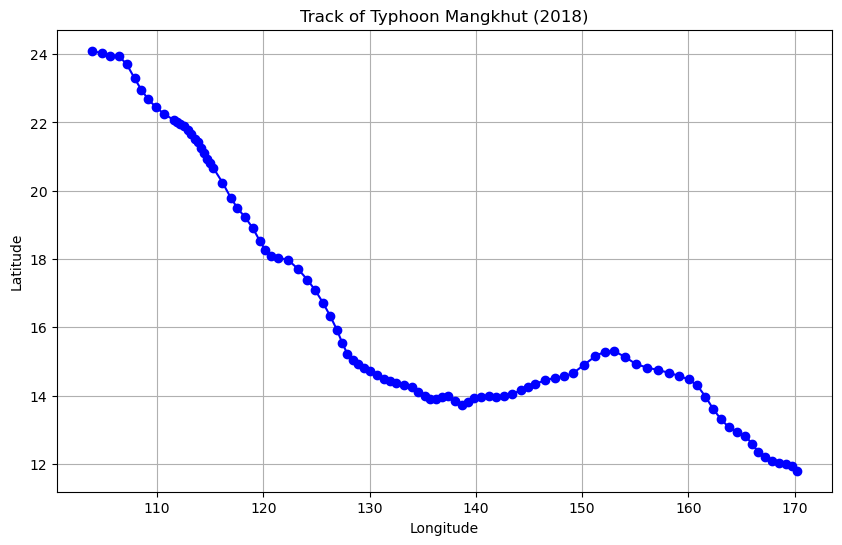

In [13]:
#3.5
# Filter for Typhoon Mangkhut (2018) ('MANGKHU' Remember to capitalize.)
mangkhut_data = df[(df['NAME'] == 'MANGKHUT') & (df['ISO_TIME'].dt.year == 2018)]

#print(mangkhut_data)

# Plot the track
plt.figure(figsize=(10, 6))
plt.plot(mangkhut_data['LON'], mangkhut_data['LAT'], marker='o', color = 'blue')
plt.title('Track of Typhoon Mangkhut (2018)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()
plt.show()


In [14]:
#3.6
# Filter data for WP and EP Basins since 1970
filtered_df = df[(df['BASIN'].isin(['WP', 'EP'])) & (df['ISO_TIME'] >= '1970-01-01')]
print(filtered_df.head())

                  SID  SEASON  NUMBER BASIN SUBBASIN   NAME  \
350393  1970050N07151    1970      22    WP       MM  NANCY   
350394  1970050N07151    1970      22    WP       MM  NANCY   
350395  1970050N07151    1970      22    WP       MM  NANCY   
350396  1970050N07151    1970      22    WP       MM  NANCY   
350397  1970050N07151    1970      22    WP       MM  NANCY   

                  ISO_TIME NATURE      LAT      LON  WMO_WIND WMO_PRES  \
350393 1970-02-19 00:00:00     TS  7.00000  151.400       NaN     1006   
350394 1970-02-19 03:00:00     TS  7.24752  151.205       NaN            
350395 1970-02-19 06:00:00     TS  7.50000  151.000       NaN     1002   
350396 1970-02-19 09:00:00     TS  7.75747  150.772       NaN            
350397 1970-02-19 12:00:00     TS  8.00000  150.500       NaN      998   

       WMO_AGENCY TRACK_TYPE  DIST2LAND LANDFALL           IFLAG  
350393      tokyo       main       1088     1088  _OO___________  
350394                  main       1109   

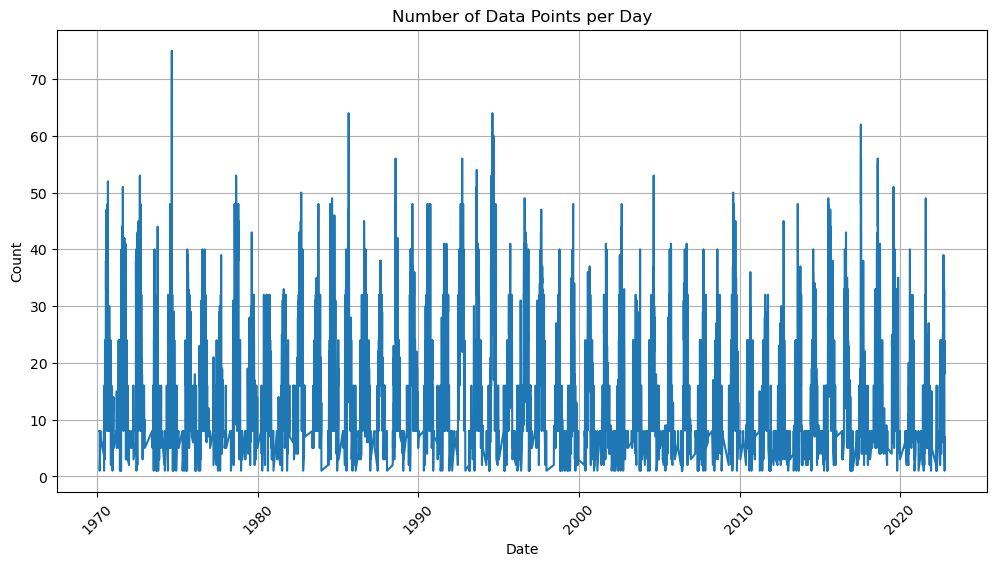

In [15]:
#3.7
# Count datapoints per day
daily_counts = filtered_df['ISO_TIME'].dt.date.value_counts().sort_index()

# Plot
plt.figure(figsize=(12, 6))
daily_counts.plot()
plt.title('Number of Data Points per Day')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid()
plt.show()

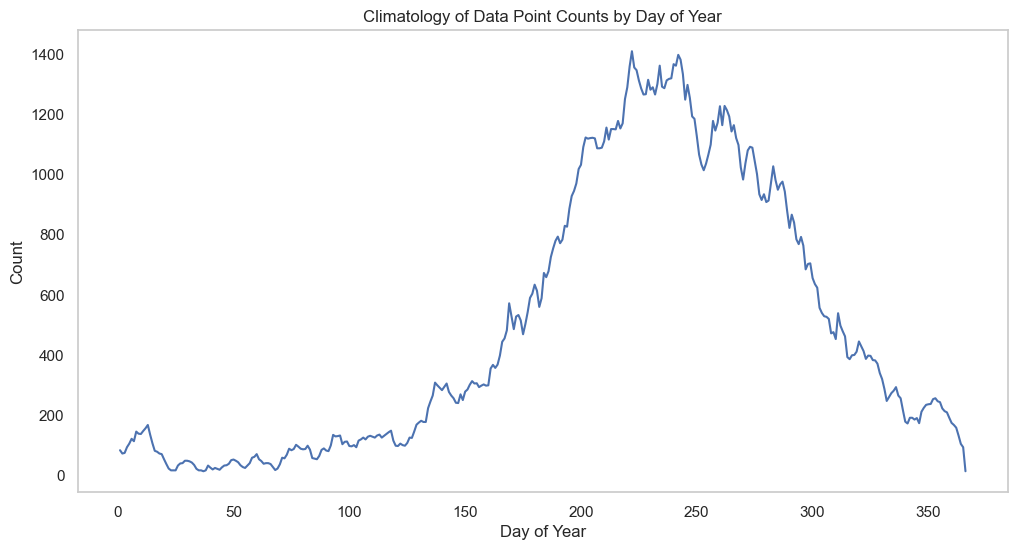

In [60]:
#3.8
# Add a Day of Year column (Will be warned by python if use)
#filtered_df['day_of_year'] = filtered_df['ISO_TIME'].dt.dayofyear

# Add a Day of Year column using .loc
filtered_df.loc[:, 'day_of_year'] = filtered_df['ISO_TIME'].dt.dayofyear


# Calculate daily counts
climatology = filtered_df.groupby('day_of_year').size()
#climatology = climatology.reindex(range(1, 366), fill_value=0)  # Fill missing days

# Plot
plt.figure(figsize=(12, 6))
climatology.plot()
plt.title('Climatology of Data Point Counts by Day of Year')
plt.xlabel('Day of Year')
plt.ylabel('Count')
plt.grid()
plt.show()


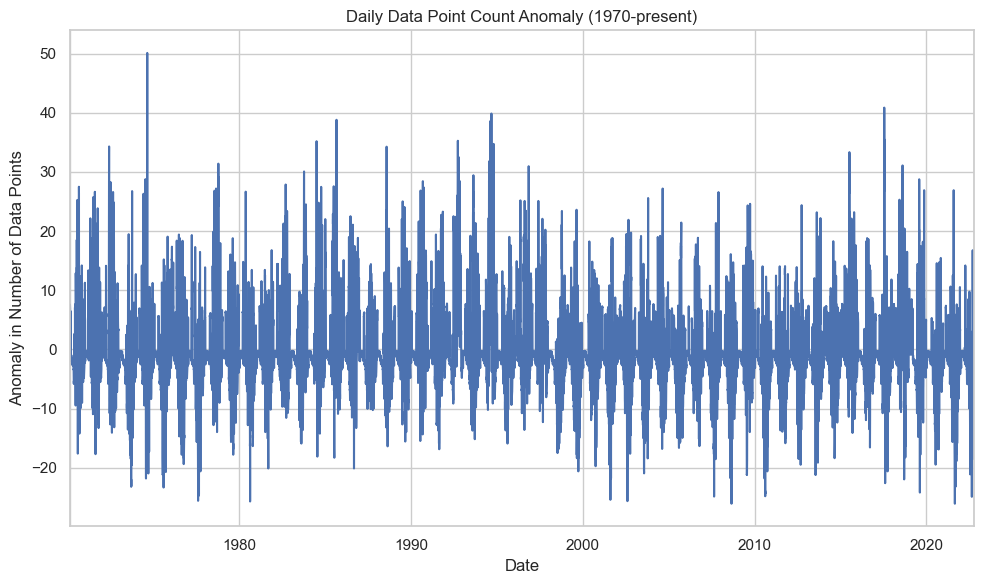

In [62]:
#3.9
# Add days of year
filtered_df['DAY_OF_YEAR'] = filtered_df['ISO_TIME'].dt.dayofyear

# Calculate climatology for each day (by dayofyear)
climatology = filtered_df.groupby('DAY_OF_YEAR').size() / len(filtered_df['ISO_TIME'].dt.year.unique())

### Note: 筛选后的数据日期从1970-02-19到2022-10-12，直接除并不是最精确的，不是所有日期的计数都一样

# Calculate the actual number of data points per day
daily_counts = filtered_df.resample('D', on='ISO_TIME').size()

# Map the dayofyear into climatology, making sure the lengths match
day_of_year_series = daily_counts.index.dayofyear
climatology_mapped = day_of_year_series.map(climatology)

# of outliers calculated: number of data points per day minus climatological values
daily_anomaly = daily_counts - climatology_mapped.values


plt.figure(figsize=(10, 6))
daily_anomaly.plot()
plt.title('Daily Data Point Count Anomaly (1970-present)')
plt.xlabel('Date')
plt.ylabel('Anomaly in Number of Data Points')
plt.grid(True)
plt.tight_layout()  
plt.show()

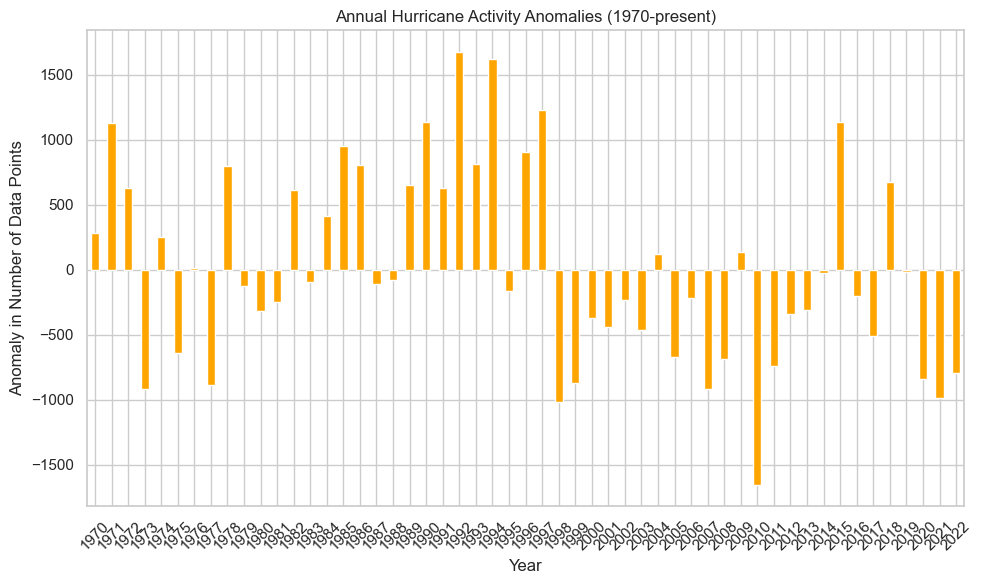

In [50]:
#3.10
# Annual resampling of outliers
annual_anomaly = daily_anomaly.resample('YE').sum()


plt.figure(figsize=(10, 6))
annual_anomaly.plot(kind='bar', color='orange')
plt.title('Annual Hurricane Activity Anomalies (1970-present)')
plt.xlabel('Year')
plt.ylabel('Anomaly in Number of Data Points')
plt.xticks(ticks=range(len(annual_anomaly)), labels=annual_anomaly.index.year, rotation=45)
plt.grid(True)
plt.tight_layout()  
plt.show()

# Print out the top8 years with the largest outliers
#print("Years with most anomalous hurricane activity:")
#print(annual_anomaly.nlargest(8))

In [19]:
#4.1
import pandas as pd
import matplotlib.pyplot as plt
# Load CSV file
file_path = 'USC00218450.csv'  
data = pd.read_csv(file_path,low_memory=False)

# View the first few rows of the data
#print('original data：')
#print(data.head())


# Remove empty columns
dc = data.dropna(axis=1, how='all')


# View cleaned data
#print('cleaned data：')
#print(dc.head())

# Use .loc to explicitly set the value of the 'DATE' column 
dc.loc[:, 'DATE'] = pd.to_datetime(dc['DATE'])
print(dc.head())

       STATION                 DATE  LATITUDE  LONGITUDE  ELEVATION  \
0  USC00218450  1960-10-01 00:00:00   44.9902  -93.17995      295.7   
1  USC00218450  1960-11-01 00:00:00   44.9902  -93.17995      295.7   
2  USC00218450  1960-12-01 00:00:00   44.9902  -93.17995      295.7   
3  USC00218450  1961-01-01 00:00:00   44.9902  -93.17995      295.7   
4  USC00218450  1961-02-01 00:00:00   44.9902  -93.17995      295.7   

                               NAME  CDSD CDSD_ATTRIBUTES  CLDD  \
0  UNIVERSITY OF MN ST. PAUL, MN US   NaN             NaN   NaN   
1  UNIVERSITY OF MN ST. PAUL, MN US   NaN             NaN   NaN   
2  UNIVERSITY OF MN ST. PAUL, MN US   NaN             NaN   NaN   
3  UNIVERSITY OF MN ST. PAUL, MN US   NaN             NaN   NaN   
4  UNIVERSITY OF MN ST. PAUL, MN US   NaN             NaN   NaN   

  CLDD_ATTRIBUTES  ...  PRCP PRCP_ATTRIBUTES  SNOW SNOW_ATTRIBUTES  TAVG  \
0             NaN  ...  10.7            ,,,Z   NaN             NaN   NaN   
1             NaN 

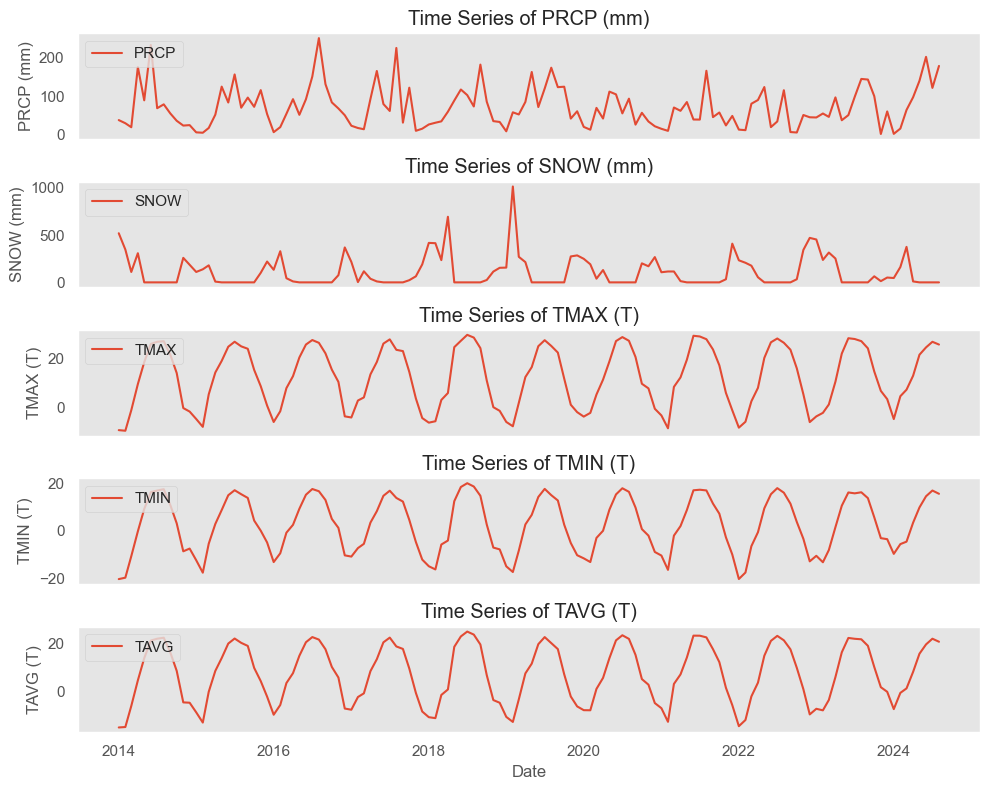

In [66]:
#4.2
# Screening the last 11 years of data (2014-2024) due to large volume of data
start_date = pd.to_datetime('2014-01-01')  # Convert to datetime
end_date = pd.to_datetime('2024-12-31') 
filtered_data = dc.loc[(dc['DATE'] >= start_date) & (dc['DATE'] <= end_date)]

# Set the drawing style
plt.style.use('ggplot')

# Define the variables to be plotted and their units
#'PRCP' = Precipitation
variables = ['PRCP', 'SNOW' , 'TMAX', 'TMIN', 'TAVG']
units = ['mm', 'mm', 'T', 'T', 'T']


# Create a graph and subgraph
fig, axs = plt.subplots(len(variables), 1, figsize=(10, 8), sharex=True)

# Loop over each variable
for i, var in enumerate(variables):
    axs[i].plot(filtered_data['DATE'], filtered_data[var], label=var)
    axs[i].set_title(f'Time Series of {var} ({units[i]})')  
    axs[i].set_ylabel(f"{var} ({units[i]})")  
    axs[i].legend(loc='upper left')
    axs[i].grid()

# Set the x-axis labels
axs[-1].set_xlabel('Date')  

# Adjustment of layout
plt.tight_layout()
plt.show()

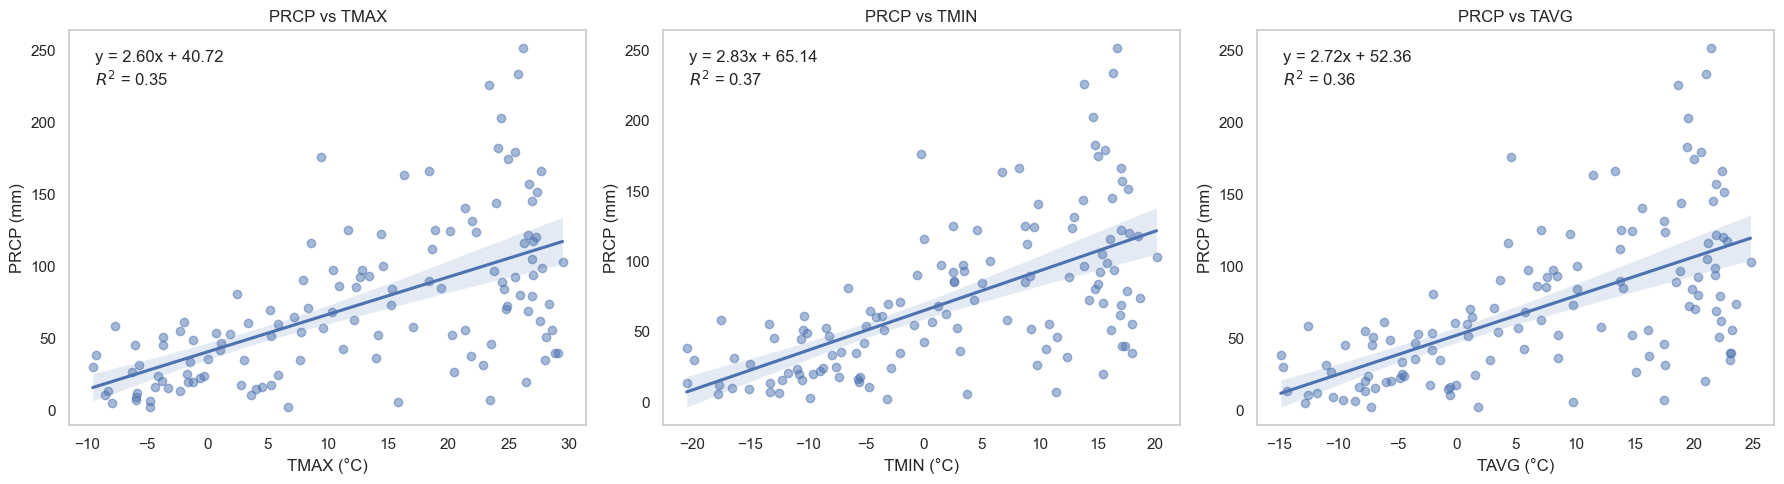

In [64]:
#4.3
#1
import seaborn as sns
import numpy as np
from scipy import stats
# Set the drawing style
sns.set(style='whitegrid')

# Create a drawing area
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Define a function to compute the regression equation and plot it
def plot_regression(x, y, ax, x_label, title):
    # Plotting regression lines and scatter plots using regplot
    sns.regplot(x=x, y=y, data=filtered_data, ax=ax, scatter_kws={'alpha':0.5})
    
    # Calculated
    slope, intercept, r_value, p_value, std_err = stats.linregress(filtered_data[x], filtered_data[y])
    equation = f'y = {slope:.2f}x + {intercept:.2f}'
    r_squared = r_value ** 2  
    
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel('PRCP (mm)')
    ax.text(0.05, 0.95, f'{equation}\n$R^2$ = {r_squared:.2f}', transform=ax.transAxes, fontsize=12, verticalalignment='top')
    ax.grid()

# Plotting the regression of 'PRCP' against 'TMAX'
plot_regression('TMAX', 'PRCP', axs[0], 'TMAX (°C)', 'PRCP vs TMAX')

# Plotting the regression of 'PRCP' against 'TMIN'
plot_regression('TMIN', 'PRCP', axs[1], 'TMIN (°C)', 'PRCP vs TMIN')

# Plotting the regression of 'PRCP' against 'TAVG'
plot_regression('TAVG', 'PRCP', axs[2], 'TAVG (°C)', 'PRCP vs TAVG')

# Adjustment of layout
plt.tight_layout()
plt.show()
# suggests that rainfall does not have much to do with the temperature of the day, but it seems that the higher the temperature, the more rainfall there is.

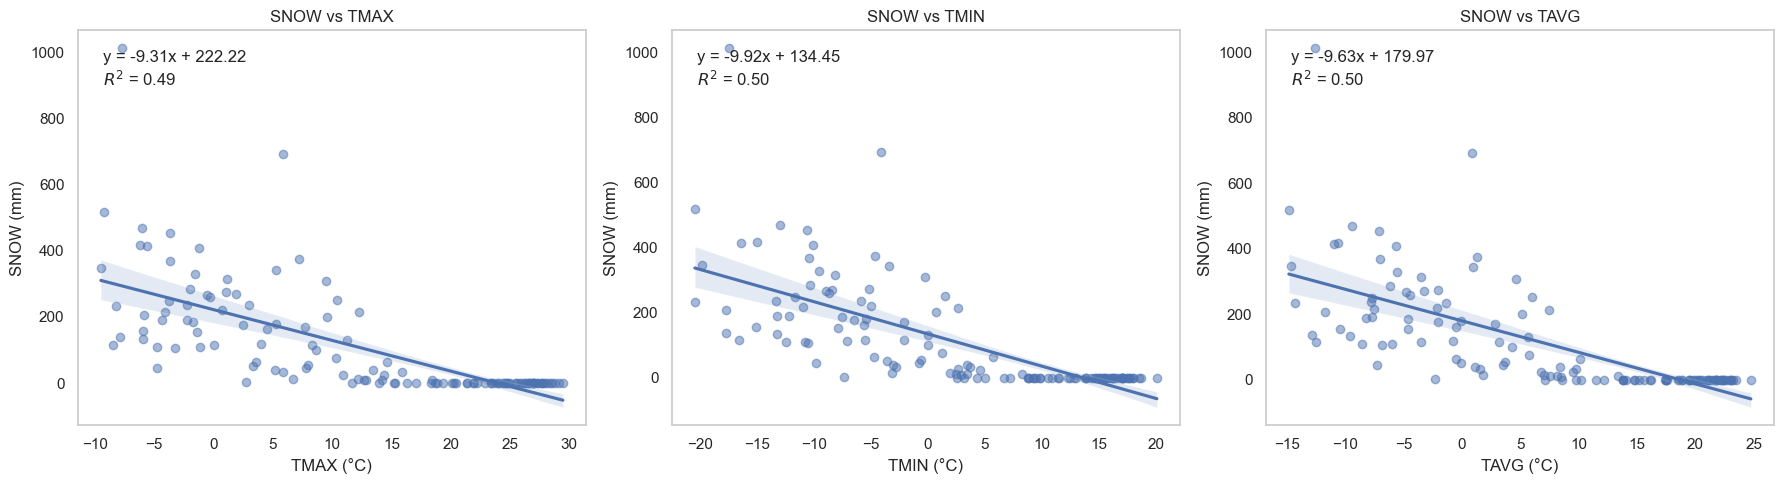

In [22]:
#2
# Set the drawing style
sns.set(style='whitegrid')

# Create a drawing area
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Define a function to compute the regression equation and plot it
def plot_regression(x, y, ax, x_label, title):
    # Plotting regression lines and scatter plots using regplot
    sns.regplot(x=x, y=y, data=filtered_data, ax=ax, scatter_kws={'alpha': 0.5})
    
    # Calculated
    slope, intercept, r_value, p_value, std_err = stats.linregress(filtered_data[x], filtered_data[y])
    equation = f'y = {slope:.2f}x + {intercept:.2f}'
    r_squared = r_value ** 2  
    
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel('SNOW (mm)')
    ax.text(0.05, 0.95, f'{equation}\n$R^2$ = {r_squared:.2f}', transform=ax.transAxes, fontsize=12, verticalalignment='top')
    ax.grid()

# Plotting the regression of 'SNOW' against 'TMAX'
plot_regression('TMAX', 'SNOW', axs[0], 'TMAX (°C)', 'SNOW vs TMAX')

# Plotting the regression of 'SNOW' against 'TMIN'
plot_regression('TMIN', 'SNOW', axs[1], 'TMIN (°C)', 'SNOW vs TMIN')

# Plotting the regression of 'SNOW' against 'TAVG'
plot_regression('TAVG', 'SNOW', axs[2], 'TAVG (°C)', 'SNOW vs TAVG')


plt.tight_layout()
plt.show()
#Might indicate that the colder the temperature the more snow falls (obvious)

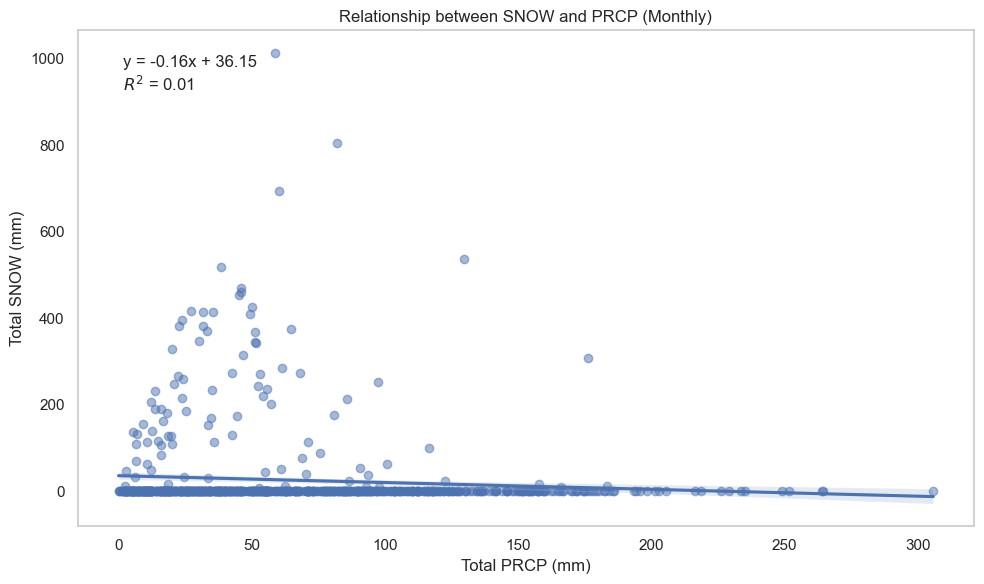

In [68]:
#3
dc['DATE'] = pd.to_datetime(dc['DATE'], errors='coerce')  # Use errors='coerce' to handle cases where conversion is not possible
# Use errors='coerce' to handle cases where conversion is not possible
monthly_data = dc.groupby(dc['DATE'].dt.to_period('M')).agg({
    'SNOW': 'sum',
    'PRCP': 'sum'
}).reset_index()

# Convert date formats
monthly_data['DATE'] = monthly_data['DATE'].dt.to_timestamp()

# Setting the drawing style
sns.set(style='whitegrid')

# Create the plot area
plt.figure(figsize=(10, 6))

# Use regplot to plot regression between 'SNOW' and 'PRCP'
sns.regplot(x='PRCP', y='SNOW', data=monthly_data, scatter_kws={'alpha': 0.5})

# Calculated
slope, intercept, r_value, p_value, std_err = stats.linregress(monthly_data['PRCP'], monthly_data['SNOW'])
equation = f'y = {slope:.2f}x + {intercept:.2f}'
r_squared = r_value ** 2  

# Setting titles and labels
plt.title('Relationship between SNOW and PRCP (Monthly)')
plt.xlabel('Total PRCP (mm)')
plt.ylabel('Total SNOW (mm)')

# Show regression equation and R^2
plt.text(0.05, 0.95, f'{equation}\n$R^2$ = {r_squared:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')


plt.grid()
plt.tight_layout()
plt.show()
# It means it's hard to snow when it's raining (obviously) 

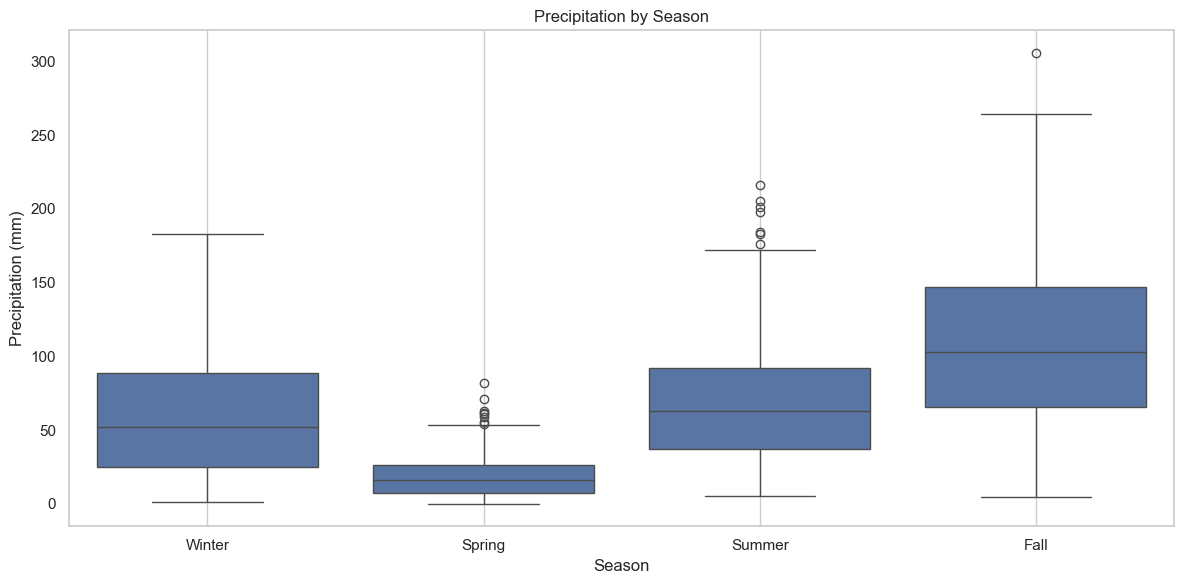

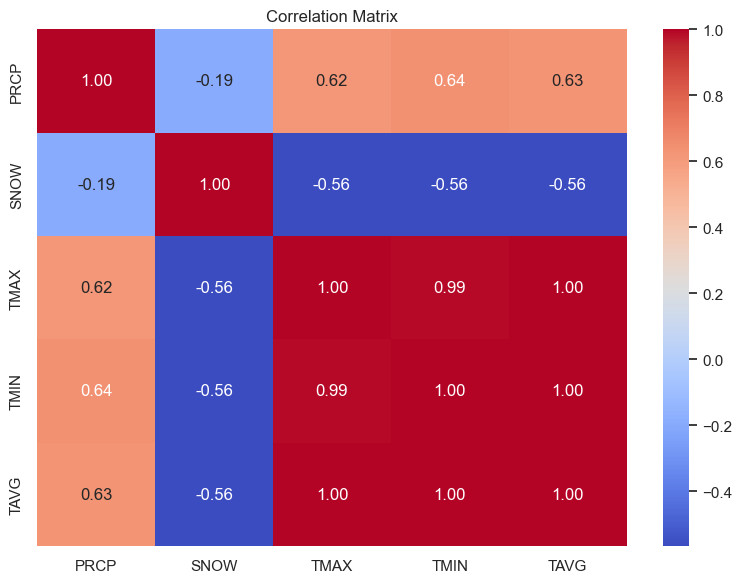

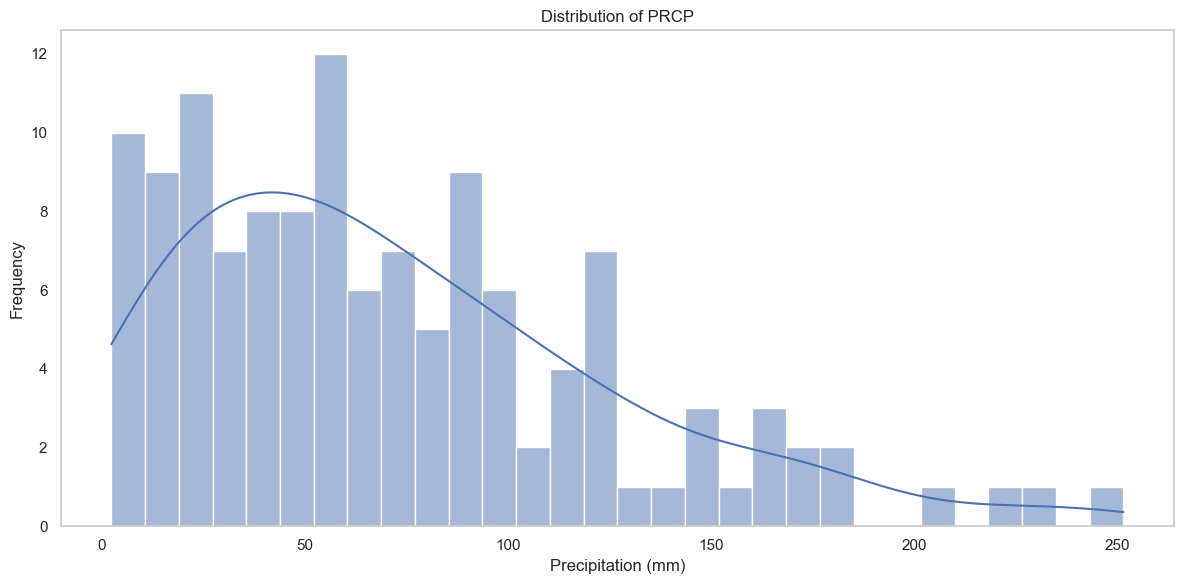

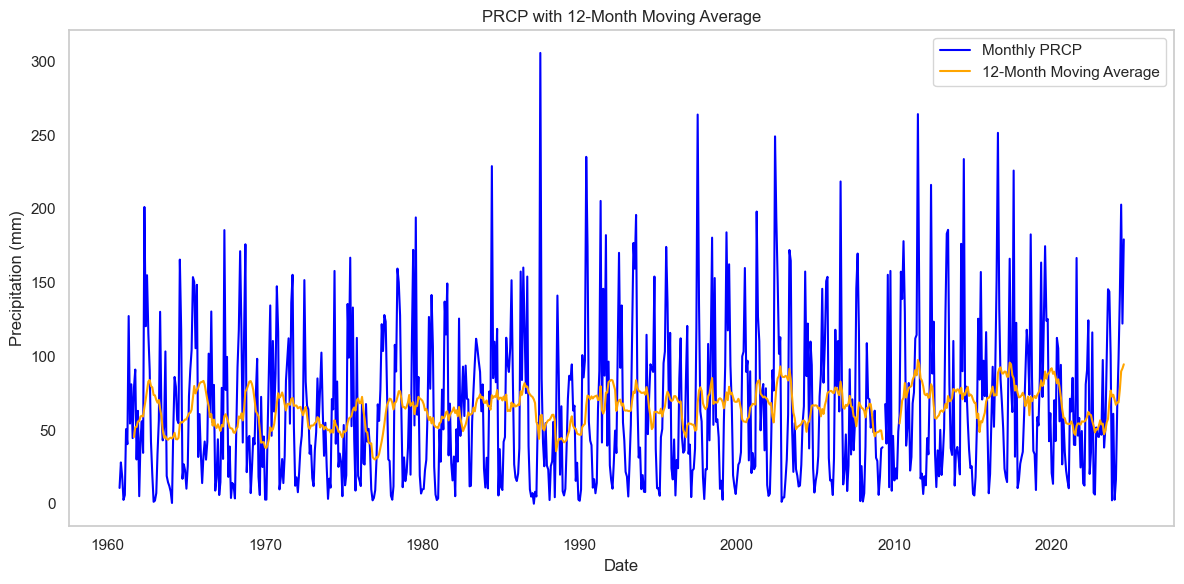

In [70]:
# Box mapping
#filtered_data['DATE'] = pd.to_datetime(filtered_data['DATE'], errors='coerce')  # 使用errors='coerce'处理无法转换的情况
# Add seasonal information
dc['Season'] = dc['DATE'].dt.month % 12 // 3 + 1
season_names = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
dc['Season'] = dc['Season'].map(season_names)

plt.figure(figsize=(12, 6))
sns.boxplot(x='Season', y='PRCP', data=dc)
plt.title('Precipitation by Season')
plt.ylabel('Precipitation (mm)')
plt.grid()
plt.tight_layout()
plt.show()

# Heat mapping
# Calculate relevance
correlation = dc[['PRCP', 'SNOW', 'TMAX', 'TMIN', 'TAVG']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


#Trendline graph
plt.figure(figsize=(12, 6))
sns.histplot(filtered_data['PRCP'], bins=30, kde=True)
plt.title('Distribution of PRCP')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Frequency')
plt.grid()
plt.tight_layout()
plt.show()


# Sliding average chart for 1960-2024
# Calculate the sliding average
dc['PRCP_MA'] = dc['PRCP'].rolling(window=12).mean()

plt.figure(figsize=(12, 6))
plt.plot(dc['DATE'], dc['PRCP'], label='Monthly PRCP', color='blue')
plt.plot(dc['DATE'], dc['PRCP_MA'], label='12-Month Moving Average', color='orange')
plt.title('PRCP with 12-Month Moving Average')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
